In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [5]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y) 

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)


[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [7]:
# Female = 0
# Male = 1

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X) 

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [8]:
# France = 1 0 0 
# Spain = 0 0 1
# Germany = 0 1 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
ann = tf.keras.models.Sequential() 
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

In [11]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [14]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5399 - accuracy: 0.7646
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4485 - accuracy: 0.7999
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.8056
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8123
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8131
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8155
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8176
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8196
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3879 - accura

In [15]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1522   73]
 [ 206  199]]


0.8605

In [17]:
#Testing on custom data
X_customer = np.array([[1,0,0,600,1,40,3,60000,2,1,1,50000]])
y_customer = ann.predict(X_customer)
y_customer = (y_customer > 0.5)
print(y_customer)

1/1 [==============================] - 0s 108ms/step
[[ True]]


Classification report 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 63.222222222222186, 'Predicted label')

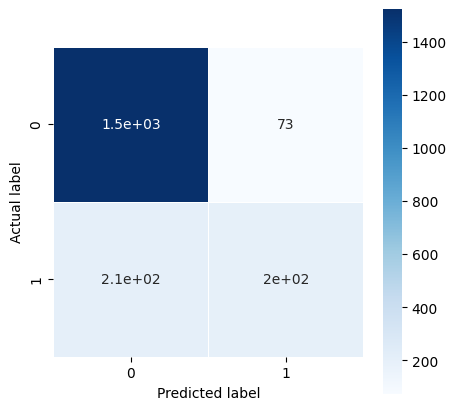

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print("Classification report \n", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')